In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,AveragePooling2D,AveragePooling3D
from keras.layers import Dense, GlobalAveragePooling3D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils, generic_utils
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D

import theano
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing


Using TensorFlow backend.
/home/renupaturkar1234/virtualenvs/videoGest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/renupaturkar1234/virtualenvs/videoGest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/renupaturkar1234/virtualenvs/videoGest/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
# image specification
img_rows,img_cols=125, 57

# Training data

X_tr=[]           # variable to store entire dataset

In [3]:
'''
import os
from tqdm import tqdm
ls_path_10 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/")
listing_10 = os.listdir(ls_path_10)
for ls_1 in listing_10:
    ls_path_11 = os.path.join(ls_path_10,ls_1)
    listing_11 = os.listdir(ls_path_11)
    for ls in tqdm(listing_11):
        listing_stop_10 = os.listdir(os.path.join(ls_path_11,ls)) 
        #print(ls)
        img_depth = len(listing_stop_10)
        if img_depth < 20:
            print(img_depth)
            print(ls)
'''

'\nimport os\nfrom tqdm import tqdm\nls_path_10 = os.path.join("//home/jovyan/program/project/3DCNN/resnet/jester/")\nlisting_10 = os.listdir(ls_path_10)\nfor ls_1 in listing_10:\n    ls_path_11 = os.path.join(ls_path_10,ls_1)\n    listing_11 = os.listdir(ls_path_11)\n    for ls in tqdm(listing_11):\n        listing_stop_10 = os.listdir(os.path.join(ls_path_11,ls)) \n        #print(ls)\n        img_depth = len(listing_stop_10)\n        if img_depth < 20:\n            print(img_depth)\n            print(ls)\n'

In [4]:
from tqdm import tqdm

ls_path = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/my/")
listing = os.listdir(ls_path)

for ls in tqdm(listing):
    listing_stop = sorted(os.listdir(os.path.join(ls_path,ls))) 
    #print(ls)
    #img_depth = len(listing_stop)
    #if img_depth < 15:
        #print(img_depth)
        #print(ls)
    frames = []
    img_depth=0
    for imgs in listing_stop:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path,ls),imgs)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #print(frame.shape)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #print(frame.shape)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:51<00:00,  4.64it/s]

(36, 57, 125, 3)
240


In [5]:
from tqdm import tqdm

ls_path_2 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/name/")
listing_2 = os.listdir(ls_path_2)

for ls_2 in tqdm(listing_2):
    listing_stop_2 = sorted(os.listdir(os.path.join(ls_path_2,ls_2)))
    #print(ls_2)
    #img_depth = len(listing_stop_2)
    #print(img_depth)
    frames = []
    img_depth= 0
    for imgs_2 in listing_stop_2:
        if img_depth < 37:
            img = os.path.join(os.path.join(ls_path_2,ls_2),imgs_2)
            #ret, frame = cap.read()
            #print(img)
            frame = cv2.imread(img)
            #print(imgs_2)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:52<00:00,  4.60it/s]

(36, 57, 125, 3)
480


In [6]:
from tqdm import tqdm

ls_path_3 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/nicetomeetyou/")
listing_3 = os.listdir(ls_path_3)

for ls_3 in tqdm(listing_3):
    listing_stop_3 = sorted(os.listdir(os.path.join(ls_path_3,ls_3)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_3 in listing_stop_3:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path_3,ls_3),imgs_3)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:51<00:00,  4.62it/s]

(36, 57, 125, 3)
720


In [7]:
from tqdm import tqdm

ls_path_4 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/no/")
listing_4 = os.listdir(ls_path_4)

for ls_4 in tqdm(listing_4):
    listing_stop_4 = sorted(os.listdir(os.path.join(ls_path_4,ls_4)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_4 in listing_stop_4:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path_4,ls_4),imgs_4)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:52<00:00,  4.58it/s]

(36, 57, 125, 3)
960


In [7]:
print(ls_4)

63


In [8]:
from tqdm import tqdm

ls_path_5 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/what/")
listing_5 = os.listdir(ls_path_5)

for ls_5 in tqdm(listing_5):
    listing_stop_5 = sorted(os.listdir(os.path.join(ls_path_5,ls_5)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_5 in listing_stop_5:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path_5,ls_5),imgs_5)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:51<00:00,  4.62it/s]

(36, 57, 125, 3)
1200


In [9]:
from tqdm import tqdm

ls_path_6 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/yes/")
listing_6 = os.listdir(ls_path_6)

for ls_6 in tqdm(listing_6):
    listing_stop_6 = sorted(os.listdir(os.path.join(ls_path_6,ls_6)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_6 in listing_stop_6:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path_6,ls_6),imgs_6)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:51<00:00,  4.66it/s]

(36, 57, 125, 3)
1440


In [10]:
from tqdm import tqdm

ls_path_6 = os.path.join("/home/renupaturkar1234/virtualenvs/videoGest/Dataset/your/")
listing_6 = os.listdir(ls_path_6)

for ls_6 in tqdm(listing_6):
    listing_stop_6 = sorted(os.listdir(os.path.join(ls_path_6,ls_6)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_6 in listing_stop_6:
        if img_depth <37:
            img = os.path.join(os.path.join(ls_path_6,ls_6),imgs_6)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

100%|██████████| 240/240 [00:52<00:00,  4.57it/s]

(36, 57, 125, 3)
1680


In [11]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array) 
print (num_samples)

1680


In [12]:
'''
label=np.ones((num_samples,),dtype = int)
label[0:74]= 0
label[75:136] = 1
'''

'\nlabel=np.ones((num_samples,),dtype = int)\nlabel[0:74]= 0\nlabel[75:136] = 1\n'

In [13]:
label=np.ones((num_samples,),dtype = int)
label[0:240]= 0
label[240:480] = 1
label[480:720] = 2
label[720:960] = 3
label[960:1200] = 4
label[1200:1440] = 5
label[1440:1680] = 6

In [11]:
img_depth = 36
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, img_depth, img_cols,img_rows,3))

for h in range(num_samples):
    train_set[h][:][:][:][:]=X_train[h,0:36,:,:]
  

patch_size = 36    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')


NameError: name 'X_tr_array' is not defined

In [15]:
img_depth = 36
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, img_depth, img_cols,img_rows,3))

i=0

for h in range(num_samples):
    print(h," ",i)
    train_set[h][0:35][:][:][:]=X_train[i][0:35,:,:,:]
    i=i+1
  

patch_size = 36    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')


X_Train shape: (1680,)
0   0
1   1
2   2
3   3
4   4
5   5
6   6
7   7
8   8
9   9
10   10
11   11
12   12
13   13
14   14
15   15
16   16
17   17
18   18
19   19
20   20
21   21
22   22
23   23
24   24
25   25
26   26
27   27
28   28
29   29
30   30
31   31
32   32
33   33
34   34
35   35
36   36
37   37
38   38
39   39
40   40
41   41
42   42
43   43
44   44
45   45
46   46
47   47
48   48
49   49
50   50
51   51
52   52
53   53
54   54
55   55
56   56
57   57
58   58
59   59
60   60
61   61
62   62
63   63
64   64
65   65
66   66
67   67
68   68
69   69
70   70
71   71
72   72
73   73
74   74
75   75
76   76
77   77
78   78
79   79
80   80
81   81
82   82
83   83
84   84
85   85
86   86
87   87
88   88
89   89
90   90
91   91
92   92
93   93
94   94
95   95
96   96
97   97
98   98
99   99
100   100
101   101
102   102
103   103
104   104
105   105
106   106
107   107
108   108
109   109
110   110
111   111
112   112
113   113
114   114
115   115
116   116
117   117
118   118
119   1

849   849
850   850
851   851
852   852
853   853
854   854
855   855
856   856
857   857
858   858
859   859
860   860
861   861
862   862
863   863
864   864
865   865
866   866
867   867
868   868
869   869
870   870
871   871
872   872
873   873
874   874
875   875
876   876
877   877
878   878
879   879
880   880
881   881
882   882
883   883
884   884
885   885
886   886
887   887
888   888
889   889
890   890
891   891
892   892
893   893
894   894
895   895
896   896
897   897
898   898
899   899
900   900
901   901
902   902
903   903
904   904
905   905
906   906
907   907
908   908
909   909
910   910
911   911
912   912
913   913
914   914
915   915
916   916
917   917
918   918
919   919
920   920
921   921
922   922
923   923
924   924
925   925
926   926
927   927
928   928
929   929
930   930
931   931
932   932
933   933
934   934
935   935
936   936
937   937
938   938
939   939
940   940
941   941
942   942
943   943
944   944
945   945
946   946
947   947
948   948


1594   1594
1595   1595
1596   1596
1597   1597
1598   1598
1599   1599
1600   1600
1601   1601
1602   1602
1603   1603
1604   1604
1605   1605
1606   1606
1607   1607
1608   1608
1609   1609
1610   1610
1611   1611
1612   1612
1613   1613
1614   1614
1615   1615
1616   1616
1617   1617
1618   1618
1619   1619
1620   1620
1621   1621
1622   1622
1623   1623
1624   1624
1625   1625
1626   1626
1627   1627
1628   1628
1629   1629
1630   1630
1631   1631
1632   1632
1633   1633
1634   1634
1635   1635
1636   1636
1637   1637
1638   1638
1639   1639
1640   1640
1641   1641
1642   1642
1643   1643
1644   1644
1645   1645
1646   1646
1647   1647
1648   1648
1649   1649
1650   1650
1651   1651
1652   1652
1653   1653
1654   1654
1655   1655
1656   1656
1657   1657
1658   1658
1659   1659
1660   1660
1661   1661
1662   1662
1663   1663
1664   1664
1665   1665
1666   1666
1667   1667
1668   1668
1669   1669
1670   1670
1671   1671
1672   1672
1673   1673
1674   1674
1675   1675
1676   1676
1677

In [16]:
X_train[0]

array([[[[130, 142, 128],
         [132, 143, 130],
         [128, 145, 129],
         ...,
         [162, 174, 170],
         [160, 172, 168],
         [155, 166, 162]],

        [[131, 144, 125],
         [131, 145, 127],
         [132, 146, 129],
         ...,
         [160, 172, 168],
         [160, 172, 168],
         [152, 164, 160]],

        [[128, 144, 125],
         [129, 143, 126],
         [133, 144, 129],
         ...,
         [161, 174, 169],
         [156, 169, 163],
         [150, 161, 155]],

        ...,

        [[119, 127, 112],
         [118, 127, 112],
         [119, 128, 113],
         ...,
         [155, 141,  94],
         [144, 139, 120],
         [140, 141, 130]],

        [[118, 126, 112],
         [116, 125, 111],
         [116, 127, 112],
         ...,
         [171, 152,  71],
         [153, 141,  97],
         [140, 138, 124]],

        [[115, 122, 109],
         [115, 123, 109],
         [116, 124, 110],
         ...,
         [168, 152,  54],
        

In [17]:
# CNN Training parameters


nb_classes = 7


In [18]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [19]:

# Pre-processing

train_set = train_set.astype('float32')
print(np.mean(train_set))
train_set -= np.mean(train_set)
print(np.max(train_set))
train_set /=np.max(train_set)

118.93692
136.06308


In [20]:
# Define model
weight_decay = 0.00005
import tensorflow as tf
keras=tf.contrib.keras
l2=keras.regularizers.l2
patch_size=36

model = Sequential()
model.add(Conv3D(16,(3,3,3),
                        input_shape=(patch_size, img_cols, img_rows, 3),
                        activation='relu'))
model.add(Conv3D(16,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2a_a', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))


model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2b_a', activation = 'relu'))
model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2b_b', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2,2)))


model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_a', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_b', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2,2)))


model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_a', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_b', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))






model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_2'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_3'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_4'))


#model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
#model.add(Flatten())
model.add(GlobalAveragePooling3D())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer='normal'))

model.add(Activation('softmax'))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#low resolution network
weight_decay = 0.005
from keras import regularizers
model = Sequential()
model.add(MaxPooling3D(pool_size=(1, 2, 2),input_shape=(patch_size, 57, 125, 3)))

model.add(Conv3D(8,(1,5,5),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(8,(5,1,1),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))

model.add(Conv3D(32,(1,5,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(32,(3,1,1), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64,(1,3,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv3D(64,(3,1,1), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 1, 4 )))



#model.add(Conv3D(128,3,3,3, activation='relu'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
#border_mode='valid'))
#model.add(BatchNormalization())

model.add(Flatten())
#model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(nb_classes,kernel_initializer='normal',kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('softmax'))

In [ ]:
#low resolution network
weight_decay = 0.005
from keras import regularizers
model = Sequential()
model.add(MaxPooling3D(pool_size=(1, 2, 2),input_shape=(patch_size, 57, 125, 3)))

model.add(Conv3D(8,(5,5,5),activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))

model.add(Conv3D(32,(3,5,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64,(3,3,5), activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(1, 1, 4 )))



#model.add(Conv3D(128,3,3,3, activation='relu'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2),
#border_mode='valid'))
#model.add(BatchNormalization())

model.add(Flatten())
#model.add(GlobalAveragePooling3D())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dropout(0.5))

model.add(Dense(nb_classes,kernel_initializer='normal',kernel_regularizer=regularizers.l2(weight_decay)))

model.add(Activation('softmax'))


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 34, 55, 123, 16)   1312      
_________________________________________________________________
Conv3D_2a_a (Conv3D)         (None, 34, 55, 123, 16)   6912      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 17, 27, 61, 16)    0         
_________________________________________________________________
Conv3D_2b_a (Conv3D)         (None, 17, 27, 61, 32)    13824     
_________________________________________________________________
Conv3D_2b_b (Conv3D)         (None, 17, 27, 61, 32)    27648     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 17, 13, 30, 32)    0         
_________________________________________________________________
Conv3D_2c_a (Conv3D)         (None, 17, 13, 30, 64)   

In [22]:
import os
#os.chdir('///home/jovyan/program/DL/11_1下tensorflow_simpson')
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "3DCNN+3LSTM_vid_3"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_acc', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose =1)

/home/renupaturkar1234/virtualenvs/videoGest


In [23]:
sgd = SGD(lr=0.0005,  momentum=0.9, nesterov=False)
rms = RMSprop(decay=1e-6)
ada = Adadelta(lr=0.01,decay=1e-6)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              #optimizer=ada,
              #optimizer = Adam(lr=0.0001),
              metrics=['acc'])
# Split the data




In [24]:
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=20)

In [25]:
batch_size = 10
nb_epoch =200
#steps_per_epoch=int((len(X_val_new)*1.5)/batch_size)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.05, 
                               cooldown=0, patience=10, min_lr=0.005/(2^4),verbose=1)
hist = model.fit(
    X_train_new,
    y_train_new,
    validation_data=(X_val_new,y_val_new),
    batch_size=batch_size,
    epochs = nb_epoch,
    shuffle=True,
    callbacks=[checkpoint,lr_reducer]
    )

Instructions for updating:
Use tf.cast instead.
Train on 1344 samples, validate on 336 samples
Epoch 1/200
1344/1344 [==============================] - 155s 115ms/step - loss: 2.1661 - acc: 0.1429 - val_loss: 2.1671 - val_acc: 0.1310

Epoch 00001: val_acc improved from -inf to 0.13095, saving model to /home/renupaturkar1234/virtualenvs/videoGest/saved_model/3DCNN+3LSTM_vid_3
Epoch 2/200
1344/1344 [==============================] - 146s 108ms/step - loss: 2.1653 - acc: 0.1481 - val_loss: 2.1640 - val_acc: 0.1131

Epoch 00002: val_acc did not improve from 0.13095
Epoch 3/200
1344/1344 [==============================] - 146s 109ms/step - loss: 2.1602 - acc: 0.1830 - val_loss: 2.1614 - val_acc: 0.1310

Epoch 00003: val_acc did not improve from 0.13095
Epoch 4/200
1344/1344 [==============================] - 146s 109ms/step - loss: 2.1601 - acc: 0.1555 - val_loss: 2.1624 - val_acc: 0.1726

Epoch 00004: val_acc improved from 0.13095 to 0.17262, saving model to /home/renupaturkar1234/virtuale


Epoch 00033: val_acc did not improve from 0.89286
Epoch 34/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.6286 - acc: 0.8266 - val_loss: 0.7256 - val_acc: 0.7500

Epoch 00034: val_acc did not improve from 0.89286
Epoch 35/200
1344/1344 [==============================] - 146s 109ms/step - loss: 0.7620 - acc: 0.7768 - val_loss: 0.6942 - val_acc: 0.7768

Epoch 00035: val_acc did not improve from 0.89286
Epoch 36/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.5983 - acc: 0.8348 - val_loss: 0.5306 - val_acc: 0.8810

Epoch 00036: val_acc did not improve from 0.89286
Epoch 37/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.5032 - acc: 0.8832 - val_loss: 0.5129 - val_acc: 0.8988

Epoch 00037: val_acc improved from 0.89286 to 0.89881, saving model to /home/renupaturkar1234/virtualenvs/videoGest/saved_model/3DCNN+3LSTM_vid_3
Epoch 38/200
1344/1344 [==============================] - 145s 108ms/step - loss: 0.4763 

1344/1344 [==============================] - 147s 109ms/step - loss: 0.2375 - acc: 1.0000 - val_loss: 0.2751 - val_acc: 0.9821

Epoch 00071: val_acc did not improve from 0.98810
Epoch 72/200
1344/1344 [==============================] - 146s 109ms/step - loss: 0.2381 - acc: 1.0000 - val_loss: 0.2659 - val_acc: 0.9821

Epoch 00072: val_acc did not improve from 0.98810
Epoch 73/200
1344/1344 [==============================] - 147s 109ms/step - loss: 0.2374 - acc: 1.0000 - val_loss: 0.2652 - val_acc: 0.9821

Epoch 00073: val_acc did not improve from 0.98810
Epoch 74/200
1344/1344 [==============================] - 147s 109ms/step - loss: 0.2362 - acc: 1.0000 - val_loss: 0.2724 - val_acc: 0.9821

Epoch 00074: val_acc did not improve from 0.98810
Epoch 75/200
1344/1344 [==============================] - 147s 109ms/step - loss: 0.2333 - acc: 1.0000 - val_loss: 0.2731 - val_acc: 0.9792

Epoch 00075: val_acc did not improve from 0.98810
Epoch 76/200
1344/1344 [==============================] - 

1344/1344 [==============================] - 145s 108ms/step - loss: 0.2252 - acc: 1.0000 - val_loss: 0.2702 - val_acc: 0.9821

Epoch 00114: val_acc did not improve from 0.98810
Epoch 115/200
1344/1344 [==============================] - 146s 109ms/step - loss: 0.2255 - acc: 1.0000 - val_loss: 0.2664 - val_acc: 0.9851

Epoch 00115: val_acc did not improve from 0.98810
Epoch 116/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.2244 - acc: 1.0000 - val_loss: 0.2679 - val_acc: 0.9851

Epoch 00116: val_acc did not improve from 0.98810
Epoch 117/200
1344/1344 [==============================] - 146s 109ms/step - loss: 0.2247 - acc: 1.0000 - val_loss: 0.2730 - val_acc: 0.9851

Epoch 00117: val_acc did not improve from 0.98810
Epoch 118/200
1344/1344 [==============================] - 145s 108ms/step - loss: 0.2252 - acc: 1.0000 - val_loss: 0.2761 - val_acc: 0.9821

Epoch 00118: val_acc did not improve from 0.98810
Epoch 119/200
1344/1344 [=============================

1344/1344 [==============================] - 146s 109ms/step - loss: 0.2209 - acc: 1.0000 - val_loss: 0.2729 - val_acc: 0.9821

Epoch 00157: val_acc did not improve from 0.98810
Epoch 158/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.2208 - acc: 1.0000 - val_loss: 0.2728 - val_acc: 0.9821

Epoch 00158: val_acc did not improve from 0.98810
Epoch 159/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.2211 - acc: 1.0000 - val_loss: 0.2772 - val_acc: 0.9821

Epoch 00159: val_acc did not improve from 0.98810
Epoch 160/200
1344/1344 [==============================] - 146s 108ms/step - loss: 0.2203 - acc: 1.0000 - val_loss: 0.2778 - val_acc: 0.9821

Epoch 00160: val_acc did not improve from 0.98810
Epoch 161/200
1344/1344 [==============================] - 146s 109ms/step - loss: 0.2210 - acc: 1.0000 - val_loss: 0.2754 - val_acc: 0.9821

Epoch 00161: val_acc did not improve from 0.98810
Epoch 162/200
1344/1344 [=============================

1344/1344 [==============================] - 146s 108ms/step - loss: 0.2186 - acc: 1.0000 - val_loss: 0.2792 - val_acc: 0.9792

Epoch 00200: val_acc did not improve from 0.98810


In [26]:
model.save('gest_dynamic_vid_3.h5')

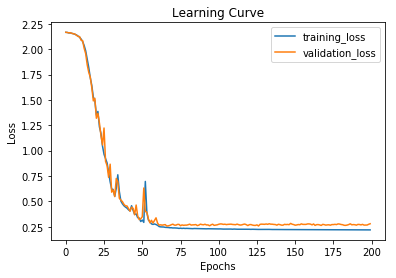

In [27]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

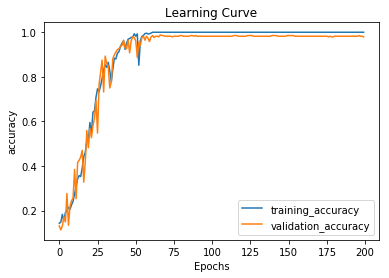

In [28]:
training_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [30]:
from keras.models import Model, load_model
model1_name = "3DCNN+3LSTM_vid_3"
model1_path = os.path.join(save_dir, model1_name)
model1 = load_model(model1_path)

model2 = load_model('/home/renupaturkar1234/virtualenvs/videoGest/gest_dynamic_vid_3.h5')

In [33]:
test_pred =model2.predict(train_set[250:256])
print(test_pred)
result = np.argmax(test_pred, axis =1)
print(result)

[[1.53297369e-04 9.99465883e-01 8.77701459e-05 6.79850928e-05
  1.36289353e-04 1.17413990e-07 8.86856797e-05]
 [1.62785247e-04 9.99388933e-01 9.44442509e-05 6.18872728e-05
  1.87329133e-04 1.20952166e-07 1.04505372e-04]
 [2.06497003e-04 9.99300361e-01 1.16323739e-04 9.44280473e-05
  1.70525920e-04 1.83945062e-07 1.11761874e-04]
 [1.54054724e-04 9.99378681e-01 4.85404635e-05 9.50890171e-05
  1.50348176e-04 1.42345769e-07 1.73084860e-04]
 [2.99263513e-04 9.95979071e-01 1.39265263e-04 1.48815961e-04
  2.58695264e-03 5.27457701e-07 8.46122450e-04]
 [1.43208061e-04 9.99484658e-01 8.02586219e-05 6.56912962e-05
  1.34738628e-04 1.12044447e-07 9.13309268e-05]]
[1 1 1 1 1 1]


In [32]:
test_pred =model1.predict(X_train_new[50:70])
result = np.argmax(test_pred, axis =1)
print(result)

[4 3 3 3 6 2 1 5 1 1 3 3 2 0 0 2 4 3 4 2]


In [34]:
img_array = X_train_new[50]

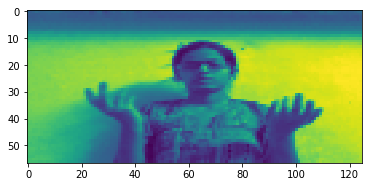

In [35]:

plt.imshow(img_array[8,:,:,2])


In [36]:
#np.argmax(y_val_new[0:20],axis =1)

In [37]:
from sklearn.metrics import confusion_matrix
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model1.predict(X_val_new),axis =1))
print(met)

[[45  0  0  0  0  0  0]
 [ 0 56  1  0  0  0  0]
 [ 0  1 45  0  0  0  0]
 [ 0  0  0 48  0  1  0]
 [ 0  0  0  0 38  0  0]
 [ 0  0  0  0  0 52  0]
 [ 0  1  0  0  0  0 48]]


In [38]:
import itertools
def confusion_matrix_plot(cm, classes, 
                          title='Normalized Confusion Matrix', 
                          normalize=True, 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

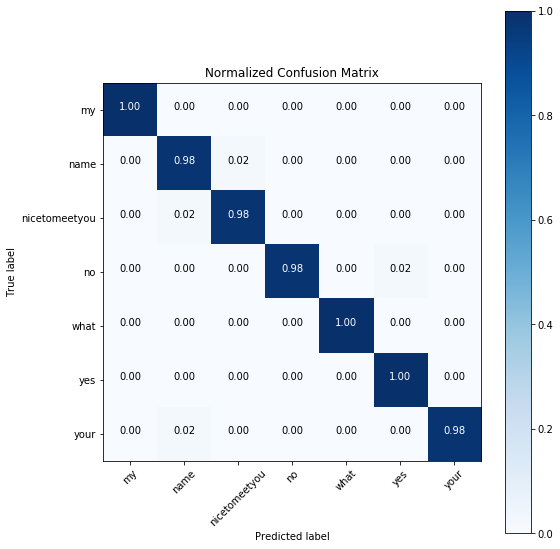

In [39]:
confusion_matrix_plot(met, classes=['my', 'name', 'nicetomeetyou', 'no','what', 'yes','your'])

In [40]:
from keras.models import Model, load_model
model1_name = "3DCNN+3LSTM_64_6_all"
model1_path = os.path.join(save_dir, model1_name)
model1 = load_model(model1_path)

model2 = load_model('/home/renupaturkar1234/virtualenvs/videoGest/gest_dynamic_all1.h5'

SyntaxError: unexpected EOF while parsing (<ipython-input-40-a816e58233c4>, line 6)

In [49]:
test_pred =model1.predict(train_set[1300:1306])
print(test_pred)
result = np.argmax(test_pred, axis =1)
print(result)

[]


AxisError: axis 1 is out of bounds for array of dimension 1

In [44]:
from keras.models import Model, load_model
model2_name = "3DCNN+3LSTM_64_6_all"
model2_path = os.path.join(save_dir, model2_name)
model2 = load_model(model2_path)

In [47]:
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model2.predict(X_val_new),axis =1))
print(met)

[[32 24  2  0  2  0]
 [16 46  1  1  6  1]
 [ 0  1 44  3  2  6]
 [ 1  0  1 47  1  3]
 [ 1  0  3  2 56  0]
 [ 0  1  3  0  1 53]]


In [40]:
model2.evaluate(X_val_new,y_val_new)

360/360 [==============================] - 1s 3ms/step


[0.8546751605139838, 0.7472222222222222]

In [46]:
for i in range(10):
    we=(i+1)/10
    we_2=1-we
    met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(we*model2.predict(X_val_new)+we_2*model1.predict(X_val_new),axis =1))
    print((met[0,0]+met[1,1]+met[2,2]+met[3,3]+met[4,4]+met[5,5])/360)

0.7416666666666667
0.7472222222222222
0.7472222222222222
0.7416666666666667
0.7527777777777778
0.7444444444444445
0.7583333333333333
0.7611111111111111
0.7666666666666667
0.7722222222222223
